<a href="https://colab.research.google.com/github/filladani/PCVK_2024/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Object Detection**

metode yang digunakan

1. template matching
2. edge detetction
3. corner detection
4. grid detection
5. contour detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

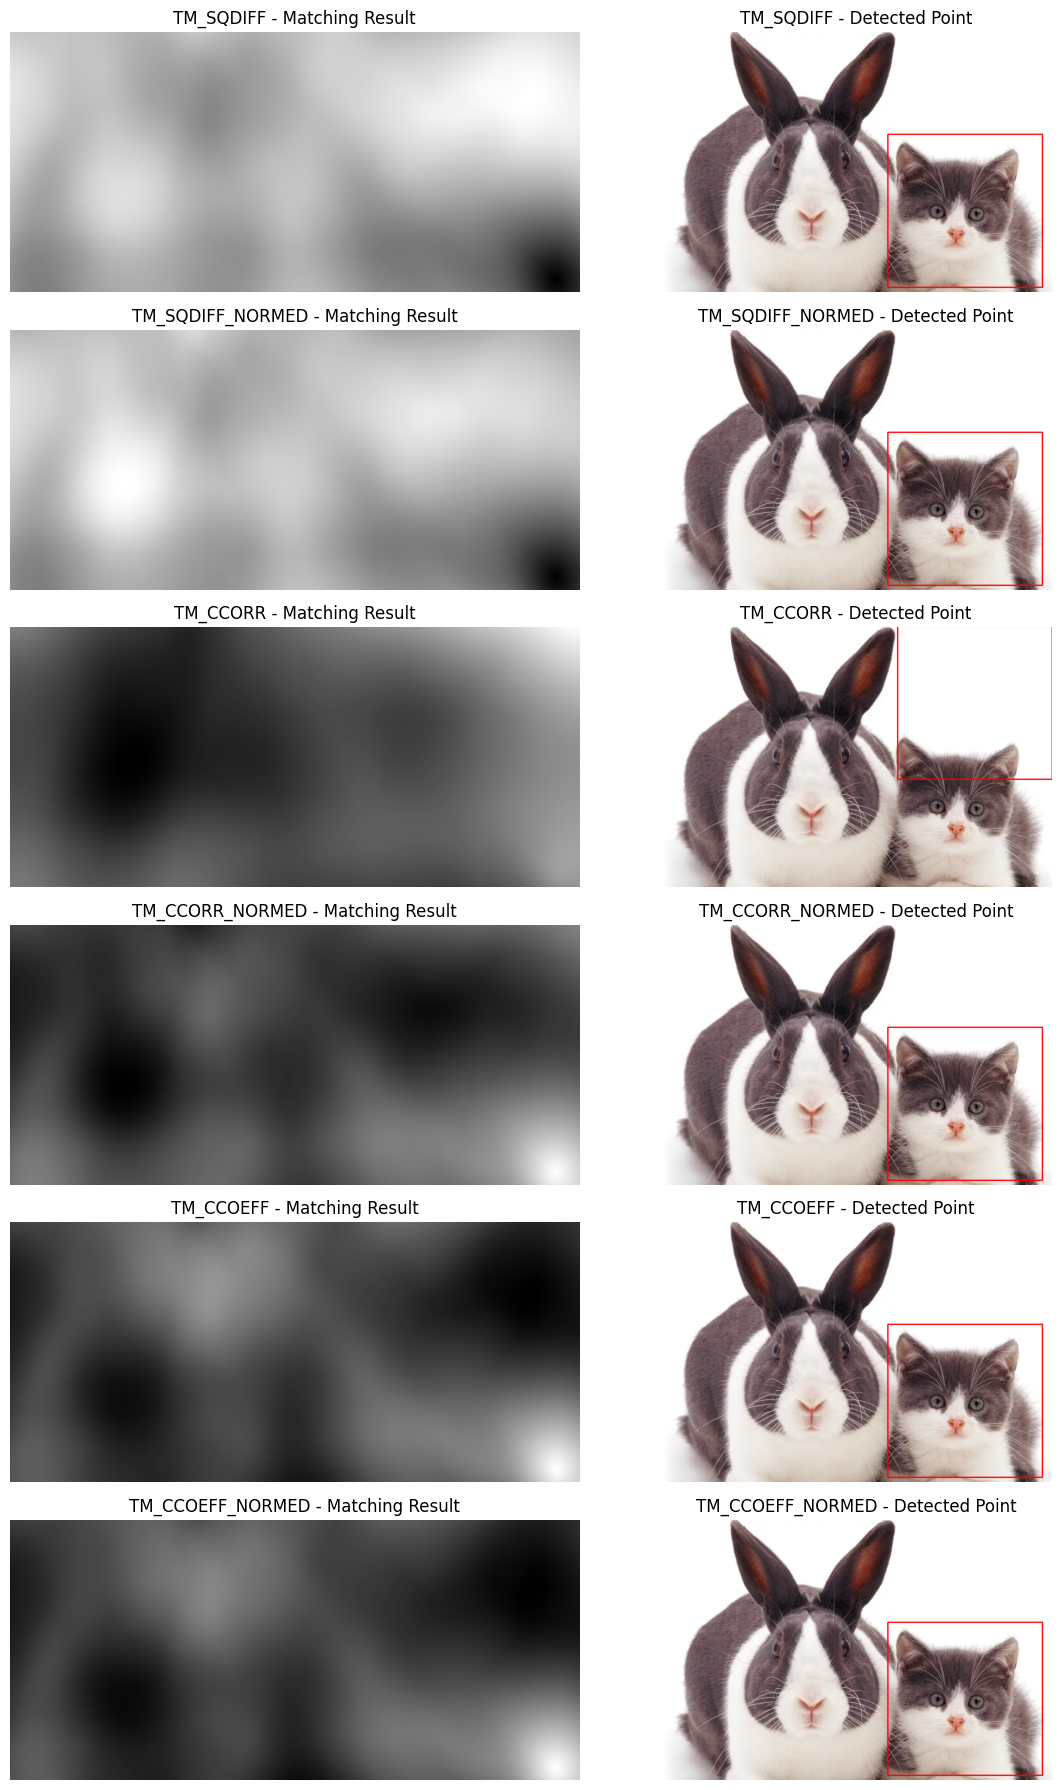

In [ ]:
# Memuat gambar dan template dalam warna
image = cv2.imread('/content/drive/MyDrive/PCVK/images/cats_and_bunnies.jpg')
template = cv2.imread('/content/drive/MyDrive/PCVK/images/cats_template.jpg', cv2.IMREAD_GRAYSCALE)

# Ukuran template
w, h = template.shape[::-1]

# Definisikan metode template matching
methods = [
    ('TM_SQDIFF', cv2.TM_SQDIFF),
    ('TM_SQDIFF_NORMED', cv2.TM_SQDIFF_NORMED),
    ('TM_CCORR', cv2.TM_CCORR),
    ('TM_CCORR_NORMED', cv2.TM_CCORR_NORMED),
    ('TM_CCOEFF', cv2.TM_CCOEFF),
    ('TM_CCOEFF_NORMED', cv2.TM_CCOEFF_NORMED)
]

# Lakukan template matching untuk setiap metode dan tampilkan hasilnya
plt.figure(figsize=(12, 18))
for i, (method_name, method) in enumerate(methods):
    # Salin gambar asli untuk menampilkan hasil
    img_copy = image.copy()

    # Ubah gambar utama menjadi grayscale untuk template matching
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Aplikasikan template matching pada gambar grayscale
    result = cv2.matchTemplate(image_gray, template, method)

    # Temukan lokasi terbaik berdasarkan metode
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # TM_SQDIFF dan TM_SQDIFF_NORMED menggunakan lokasi minimum, sisanya maksimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc

    # Tentukan koordinat kotak pembatas (bounding box)
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img_copy, top_left, bottom_right, (0, 0, 255), 2)

    # Tampilkan hasil pencocokan dan deteksi pada gambar asli
    plt.subplot(len(methods), 2, 2*i + 1)
    plt.imshow(result, cmap='gray')
    plt.title(f"{method_name} - Matching Result")
    plt.axis('off')

    plt.subplot(len(methods), 2, 2*i + 2)
    plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
    plt.title(f"{method_name} - Detected Point")
    plt.axis('off')

plt.tight_layout()
plt.show()

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template,

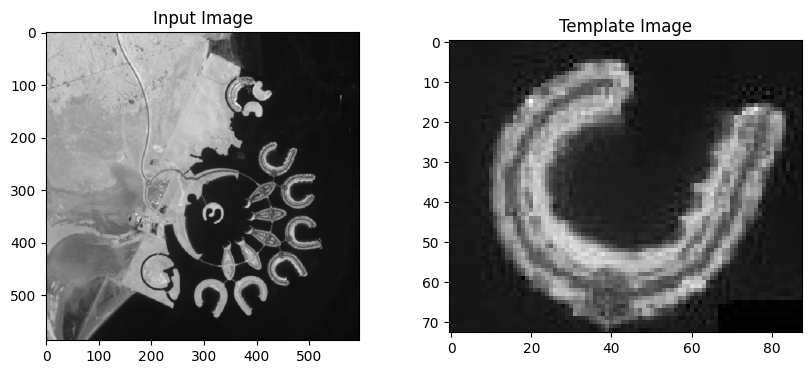

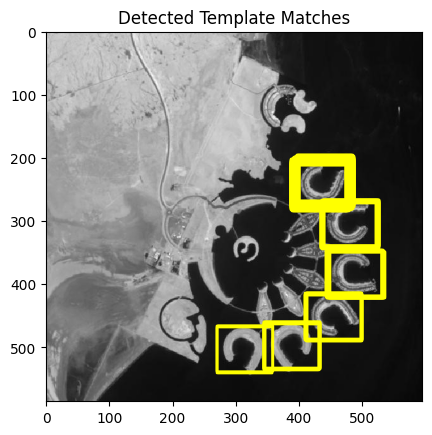

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import match_template

# Load the input image and template
main_image = cv2.imread('/content/drive/MyDrive/PCVK/images/bahrain.jpg', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('/content/drive/MyDrive/PCVK/images/bahrain-template.jpg', cv2.IMREAD_GRAYSCALE)

# Display input image and template
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(main_image, cmap='gray')
axes[0].set_title("Input Image")
axes[1].imshow(template, cmap='gray')
axes[1].set_title("Template Image")

# Perform template matching
result = match_template(main_image, template)

# Define threshold and locate matches
threshold = 0.45
locations = np.column_stack(np.where(result >= threshold))

# Display the result on the main image
fig, ax = plt.subplots()
ax.imshow(main_image, cmap='gray')
ax.set_title("Detected Template Matches")

# Draw rectangles around matches
height, width = template.shape
for loc in locations:
    rect = plt.Rectangle((loc[1], loc[0]), width, height, edgecolor='yellow', facecolor='none', linewidth=1)
    ax.add_patch(rect)

plt.show()


4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg,

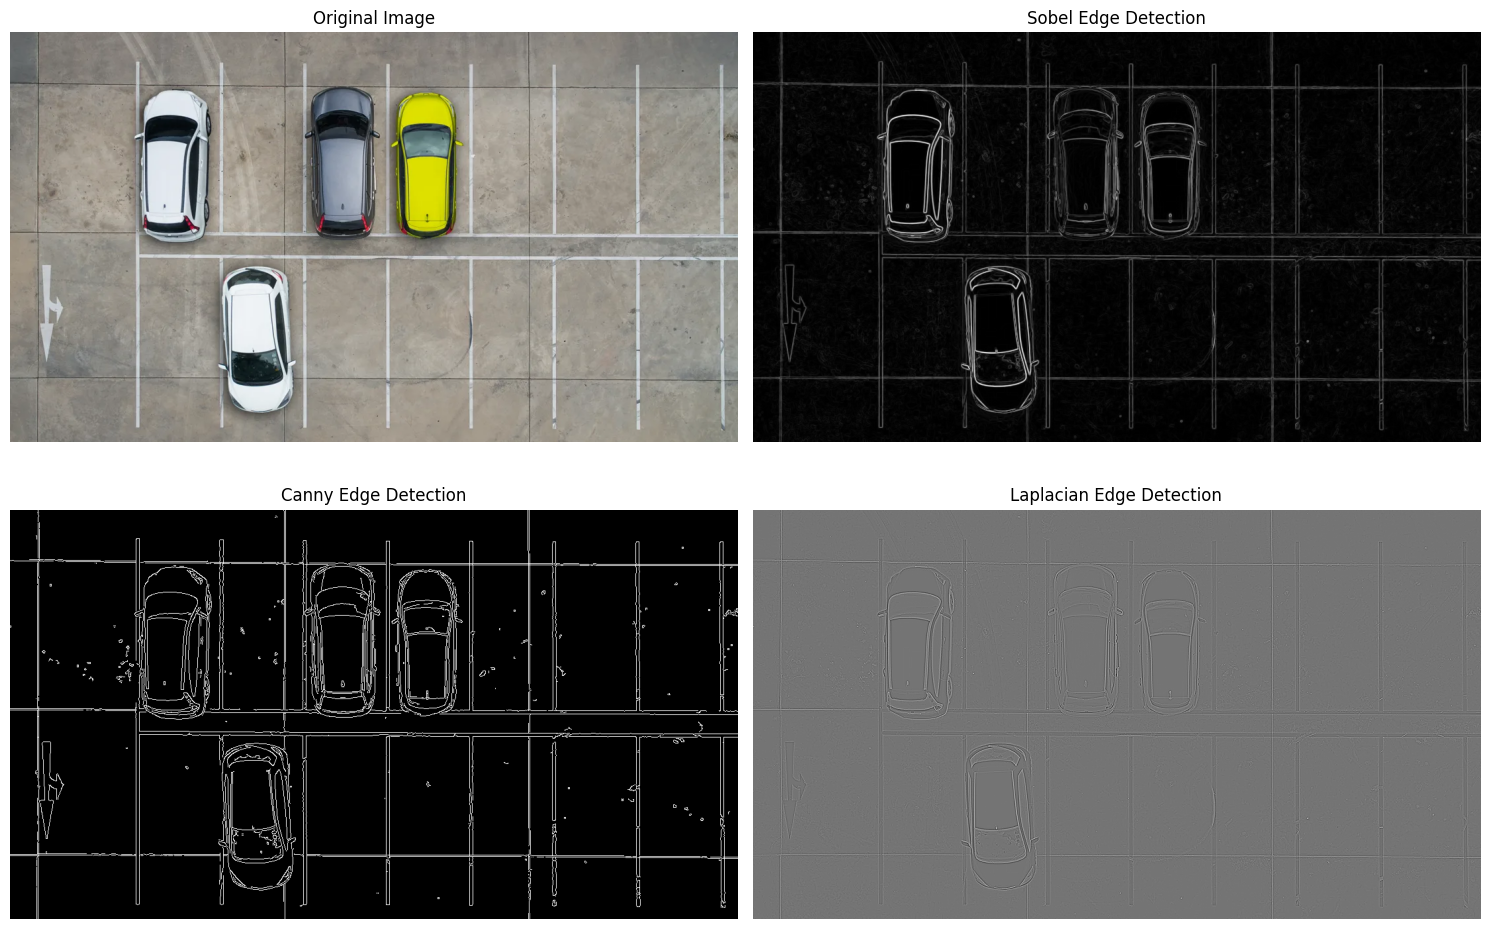

In [ ]:
# Baca gambar
image_path = '/content/drive/MyDrive/PCVK/images/car-park.jpg'  # Sesuaikan path dengan lokasi gambar Anda di Colab
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Konversi gambar ke skala abu-abu
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sobel Edge Detection
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Canny Edge Detection
canny_edges = cv2.Canny(gray_image, 100, 200)

# Laplacian Edge Detection
laplacian_edges = cv2.Laplacian(gray_image, cv2.CV_64F)

# Tampilkan hasil
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(laplacian_edges, cmap='gray')
plt.title('Laplacian Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg,

<ipython-input-10-3ce8973ab40e>:15: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


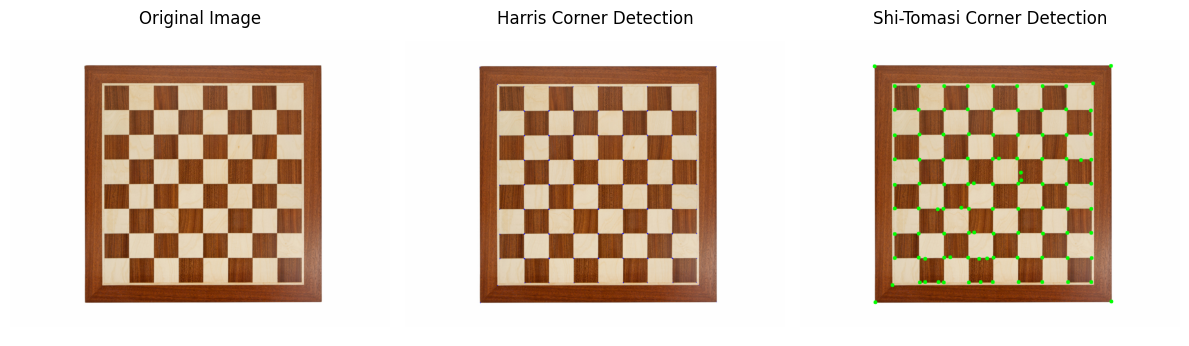

In [ ]:
# Memuat gambar
image = cv2.imread('/content/drive/MyDrive/PCVK/images/chess-board.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Deteksi sudut menggunakan metode Harris Corner Detection
gray_harris = np.float32(gray)
harris_corners = cv2.cornerHarris(gray_harris, blockSize=2, ksize=3, k=0.04)

# Mempertebal titik sudut pada hasil Harris Corner Detection
image_harris = image.copy()
image_harris[harris_corners > 0.01 * harris_corners.max()] = [255, 0, 0]  # Warna merah untuk titik Harris

# Deteksi sudut menggunakan metode Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)

# Plot hasil Shi-Tomasi Corner Detection
image_shi_tomasi = image.copy()
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image_shi_tomasi, (x, y), 5, (0, 255, 0), -1)  # Warna hijau untuk titik Shi-Tomasi

# Tampilkan hasil
plt.figure(figsize=(12, 6))

# Menampilkan gambar asli
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Menampilkan hasil Harris Corner Detection
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(image_harris, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')

# Menampilkan hasil Shi-Tomasi Corner Detection
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(image_shi_tomasi, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori,

Number of filtered lines: 20


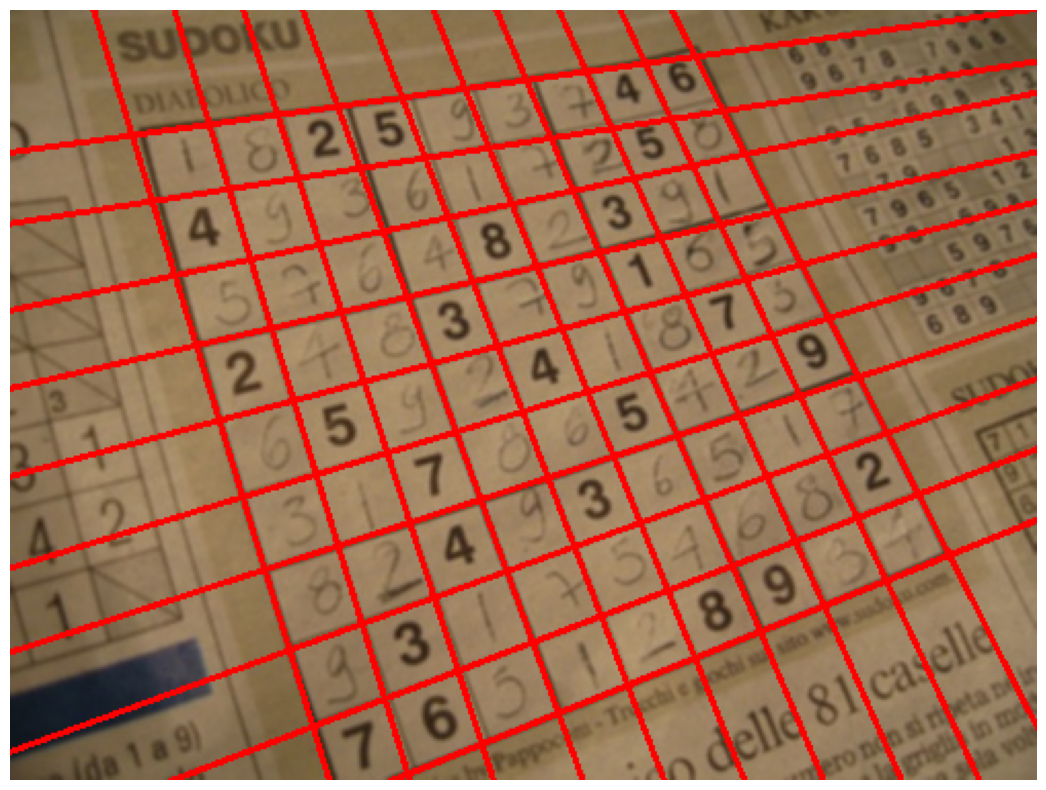

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the input image and convert to grayscale
input_img = cv.imread('/content/drive/MyDrive/PCVK/images/sudoku.jpg')
img_gray = cv.cvtColor(input_img, cv.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv.Canny(img_gray, 90, 150, apertureSize=3)

# Apply dilation and erosion
edges = cv.dilate(edges, np.ones((3, 3), np.uint8), iterations=1)
edges = cv.erode(edges, np.ones((5, 5), np.uint8), iterations=1)

# Detect lines using Hough Transform
lines = cv.HoughLines(edges, 1, np.pi / 180, 150)

if lines is None:
    print('No lines were found')
else:
    # Filtering similar lines
    rho_threshold = 15
    theta_threshold = 0.1

    similar_lines = {i: [] for i in range(len(lines))}
    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):
            rho_i, theta_i = lines[i][0]
            rho_j, theta_j = lines[j][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                similar_lines[i].append(j)

    # Mark lines to keep based on filtering
    line_flags = [True] * len(lines)
    for i in range(len(lines)):
        if not line_flags[i]:
            continue
        for j in similar_lines[i]:
            line_flags[j] = False

    # Extract filtered lines
    filtered_lines = [lines[i] for i in range(len(lines)) if line_flags[i]]
    print('Number of filtered lines:', len(filtered_lines))

    # Draw the filtered lines on the input image
    for line in filtered_lines:
        rho, theta = line[0]
        a, b = np.cos(theta), np.sin(theta)
        x0, y0 = a * rho, b * rho
        x1, y1 = int(x0 + 1000 * (-b)), int(y0 + 1000 * a)
        x2, y2 = int(x0 - 1000 * (-b)), int(y0 - 1000 * a)
        cv.line(input_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Display the result
    plt.figure(figsize=(20, 10))
    plt.imshow(cv.cvtColor(input_img, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan
menggunakan gambar laptop.jpg,

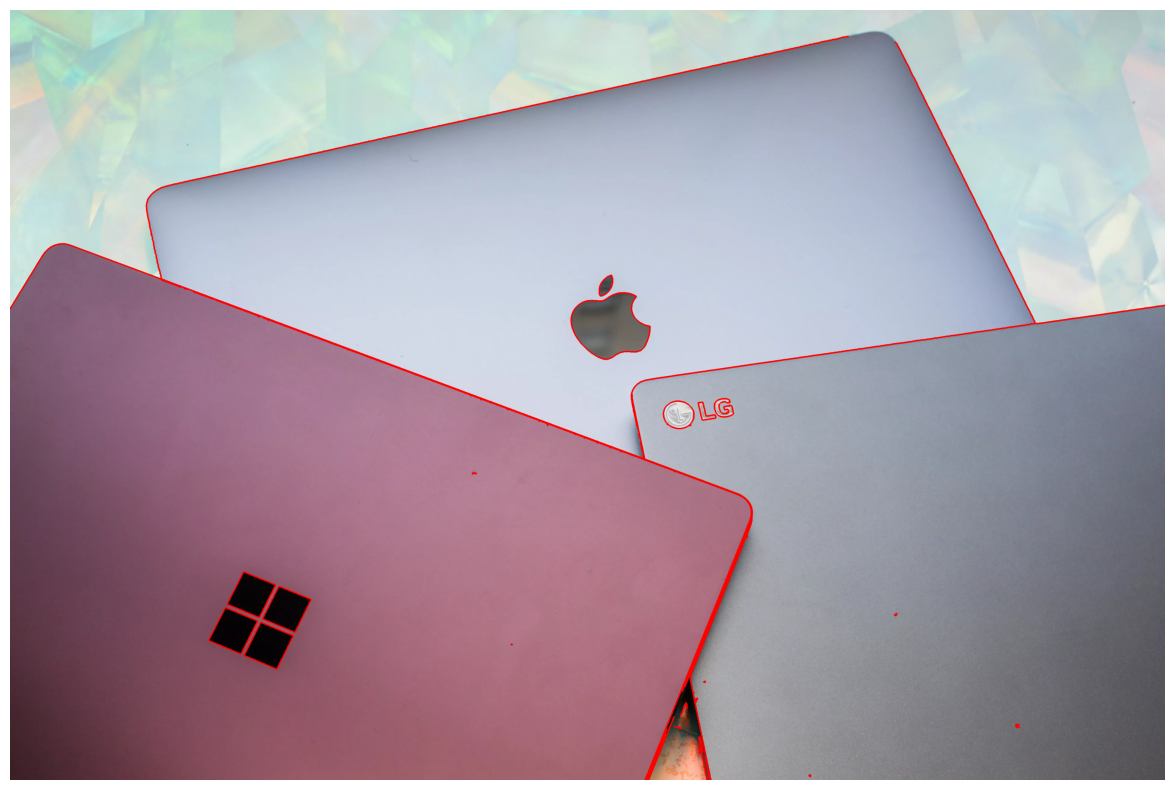

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale
img = cv.imread('/content/drive/MyDrive/PCVK/images/laptop.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Perform Canny edge detection
edges = cv.Canny(img_gray, 30, 200)

# Find contours
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Draw contours on the original image
cv.drawContours(img, contours, -1, (0, 0, 255), 3)

# Display the result
plt.figure(figsize=(20, 10))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')  # Hide axis for cleaner output
plt.show()


# Pengayaan Materi KTP

In [5]:
import cv2
from google.colab.patches import cv2_imshow
import os

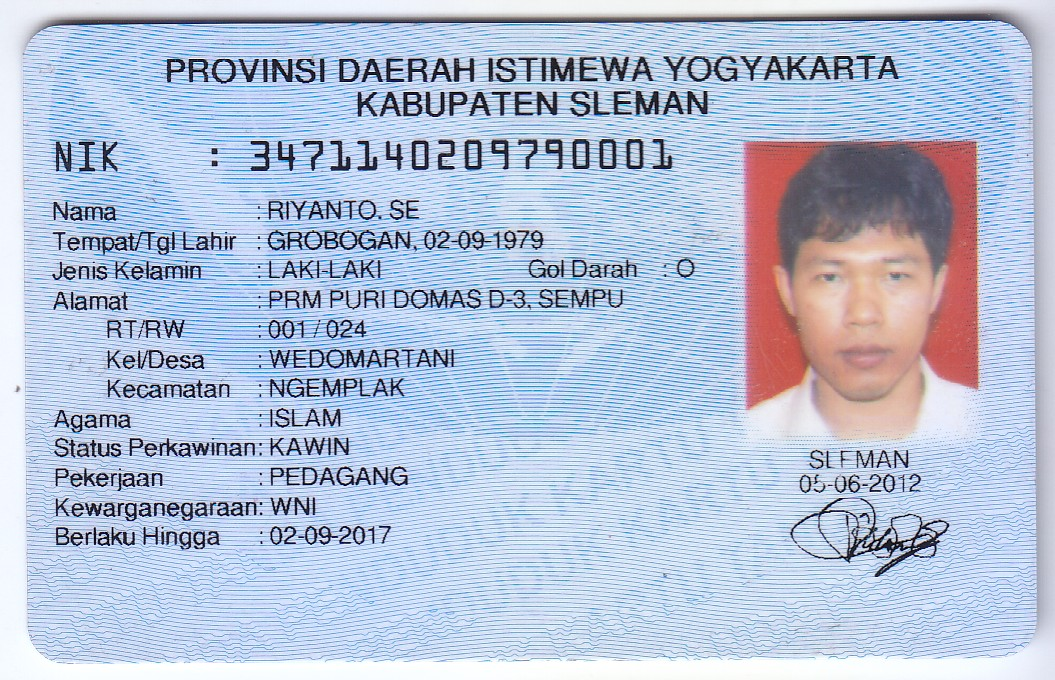

In [6]:
# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PCVK/images/ktp.png')
cv2_imshow(ktp)

In [7]:
# Lokasi hasil pelat
path_plate = "/content/drive/MyDrive/PCVK/week11"
# Looping file di direktori
for name_file in sorted(os.listdir(path_plate)):
    src = cv2.imread(os.path.join(path_plate, name_file))
    blurred = src.copy()
    gray = blurred.copy()

In [8]:
# Filtering
for i in range(10):
    blurred = cv2.GaussianBlur(src, (5, 5), 0.5)

156.0 (680, 1055)


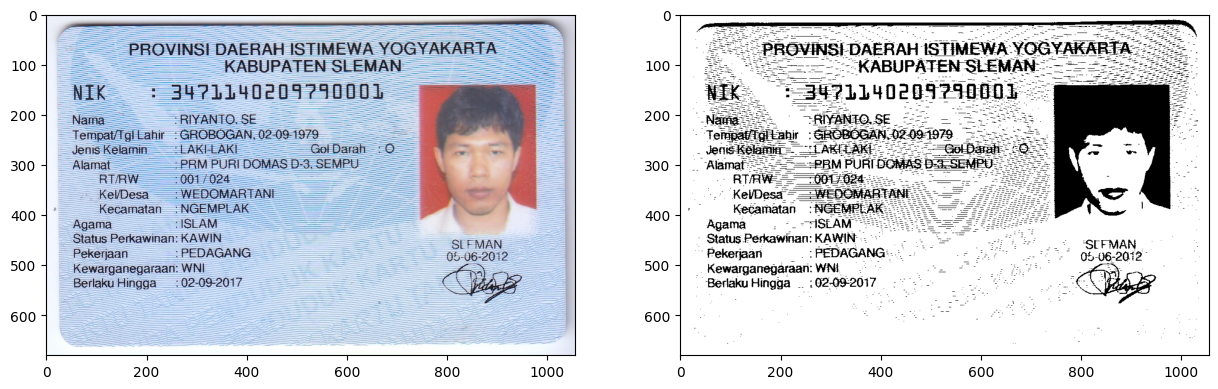

In [9]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY
+ cv2.THRESH_OTSU)
print(ret, bw.shape)

# Tampilkan gambar asli dan hasil deteksi tepi
f, axarr = plt.subplots(1,2,figsize=(15,5))
axarr[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
axarr[1].imshow(bw, cmap='gray')
plt.show()

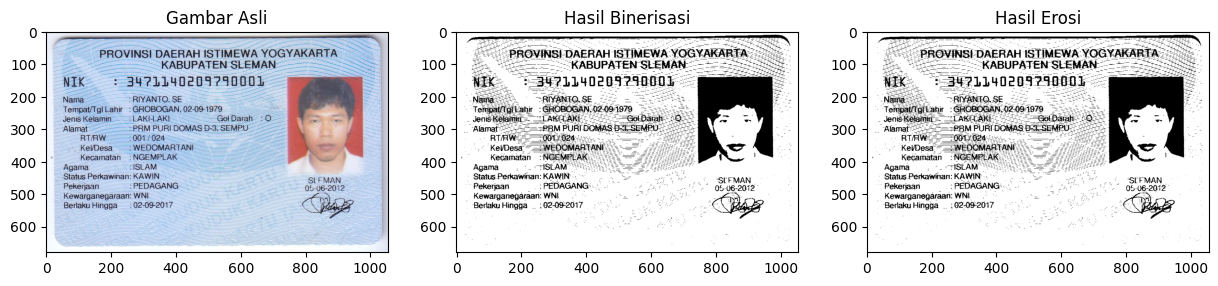

In [10]:
# Ubah ke grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Terapkan operasi morfologi erosi
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Tampilkan gambar asli, hasil deteksi tepi, dan hasil erosi
f, axarr = plt.subplots(1, 3, figsize=(15, 5))
axarr[0].imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
axarr[0].set_title("Gambar Asli")
axarr[1].imshow(bw, cmap='gray')
axarr[1].set_title("Hasil Binerisasi")
axarr[2].imshow(erode, cmap='gray')
axarr[2].set_title("Hasil Erosi")
plt.show()

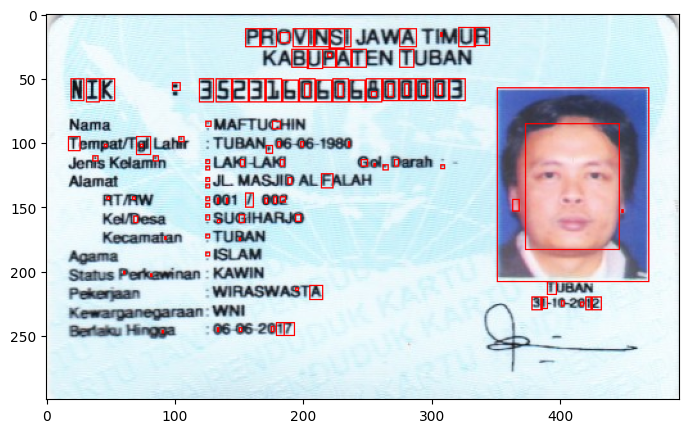

In [14]:
# Load the input image
ktp = cv2.imread('/content/drive/MyDrive/PCVK/week11/ktp3.png')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

plt.figure(figsize=(10,5))
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))